In [1]:
# importing libraries

import os
import glob
import matplotlib
import math
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

### Parameters

| Column 1                   | Column 2                         | Column 3                           | Column 4                           | Column 5                           |
|:----------------------------|:----------------------------------|:------------------------------------|:------------------------------------|:------------------------------------|
| <span style="font-size:16px">0. time</span>                    | <span style="font-size:16px">8. particle pressure</span>       | <span style="font-size:16px">16. frictional contact number</span> | <span style="font-size:16px">24. kt</span>                    | <span style="font-size:16px">32. std(Z)</span>                 |
| <span style="font-size:16px">1. cumulated shear strain</span>   | <span style="font-size:16px">9. particle pressure contact</span> | <span style="font-size:16px">17. average sliding friction</span> | <span style="font-size:16px">25. kr</span>                    | <span style="font-size:16px">33. mean(Znet)</span>              |
| <span style="font-size:16px">2. shear rate</span>               | <span style="font-size:16px">10. N1 viscosity</span>             | <span style="font-size:16px">18. number of interactions</span>  | <span style="font-size:16px">26. shear strain (x) = 0</span>         | <span style="font-size:16px">34. std(Znet)</span>              |
| <span style="font-size:16px">3. viscosity</span>                | <span style="font-size:16px">11. N2 viscosity</span>             | <span style="font-size:16px">19. max tangential displacement</span> | <span style="font-size:16px">27. shear strain (y) = 0</span>         |                                    |
| <span style="font-size:16px">4. Viscosity(contact)</span>       | <span style="font-size:16px">12. energy</span>                   | <span style="font-size:16px">20. max angular velocity</span>   | <span style="font-size:16px">28. shear strain (z)</span>         |                                    |
| <span style="font-size:16px">5. Viscosity(dashpot)</span>       | <span style="font-size:16px">13. min gap</span>                  | <span style="font-size:16px">21. dt</span>                    | <span style="font-size:16px">29. theta shear</span>          |                                    |
| <span style="font-size:16px">6. Viscosity(hydro)</span>         | <span style="font-size:16px">14. max tangential displacement</span> | <span style="font-size:16px">22. max velocity</span>          | <span style="font-size:16px">30. Rigid clusters</span>       |                                    |
| <span style="font-size:16px">7. Viscosity(repulsion)</span>     | <span style="font-size:16px">15. contact number</span>           | <span style="font-size:16px">23. kn</span>                    | <span style="font-size:16px">31. mean(Z)</span>              |                                    |


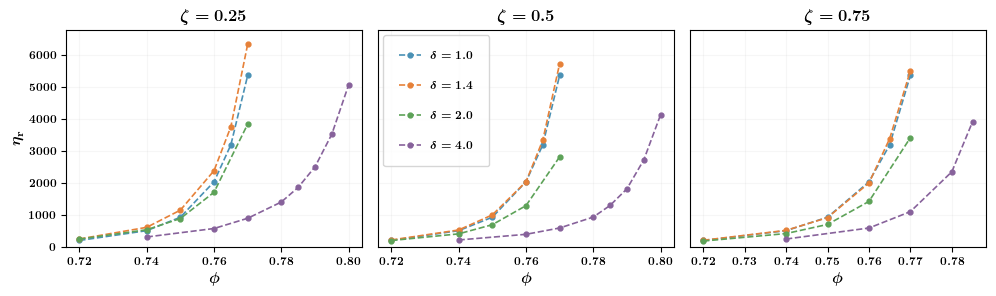

In [3]:
# Viscosity plot
# Reading the data_*.dat file

npp      = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.80] #[0.70, 0.72, 0.74, 0.77]
#phi_vals = [0.70, 0.78] 
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2, 4]
numRuns  = 2
off      = 100
cmap     = matplotlib.colormaps['viridis_r'] 

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

fig,axs = plt.subplots(nrows=1, ncols=len(vr_vals), figsize=(10, 3))
    
for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        visc = []
        for k, phi in enumerate(phi_vals):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir+"data_*.dat")
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 
        
        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phi_vals) if not np.isnan(x)]
        axs[i].plot(phi_vals_filtered, visc_filtered, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
             color=colors[j],linewidth=1.2, markersize=3.5)
        axs[i].set_xlabel(r'$\mathbf{\phi}$', fontsize=11)
        axs[i].set_title(fr'$\zeta = {vr_vals[i]}$', fontsize=12)
        axs[i].grid('both', alpha = .1)
        axs[i].set_ylim(0, 6800)
        
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$\mathbf{\eta_{r}}$', fontsize=11)
axs[1].legend(loc = 'best', labelspacing=1.8, borderpad=1.4)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+"Viscosity2"+figFormat, bbox_inches="tight",dpi=500)
plt.show()

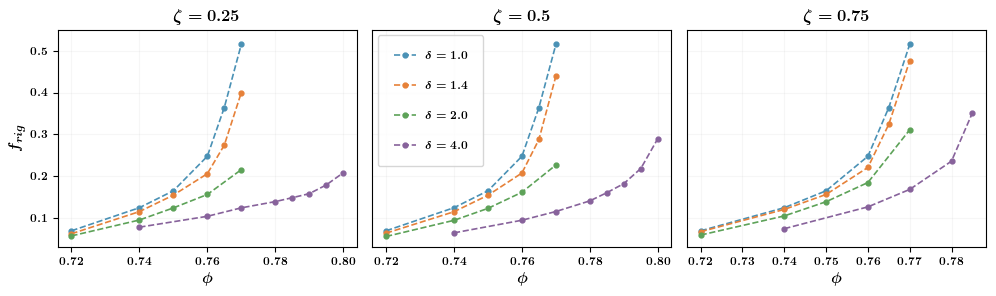

In [5]:
# F_rig plot
# Reading the data_*.dat file

npp      = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 2
off      = 100
cmap     = matplotlib.colormaps['viridis_r'] 

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

fig,axs = plt.subplots(nrows=1, ncols=len(vr_vals), figsize=(10, 3))

for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        frig =[]
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            frig_list = []
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = workDir+"F_rig.txt"
                    data     = np.loadtxt(dataFile)
                    frig_list.append(np.mean(data[off:])) if len(data[off:]) > off else None
            frig.append(np.mean(frig_list)/npp if frig_list else np.nan) 

        frig_filtered     = [x for x in frig if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(frig, phi_vals) if not np.isnan(x)]
        axs[i].plot(phi_vals_filtered, frig_filtered, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
             color=colors[j],linewidth=1.2, markersize=3.5)
        axs[i].set_xlabel(r'$\mathbf{\phi}$', fontsize=11)
        axs[i].set_title(fr'$\zeta = {vr_vals[i]}$', fontsize=12)
        axs[i].grid('both', alpha = .1)
        axs[i].set_ylim(0.03, 0.55)
        
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$f_{rig}$', fontsize=11)
axs[1].legend(loc = 'best', labelspacing=1.8, borderpad=1.4)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+"frig"+figFormat, bbox_inches="tight",dpi=500)
plt.show()

In [5]:
# checig if all cases are complete (gamma =20)

npp      = 1000
phi_vals = [0.785]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [4.0]
numRuns  = 2
off      = 100
tGamma   = 20 #target

#mac
topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'

for i, vr in enumerate(vr_vals):
    print('\\')
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            cDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}"
            if os.path.exists(cDir + "/run_1/") and not os.path.exists(cDir + "/run_2/"):
                print(f'run 2 does not exist: {cDir}')
            if os.path.exists(cDir + "/run_2/") and not os.path.exists(cDir + "/run_1/"):
                print(f'run 1 does not exist: {cDir}')
                
            if os.path.exists(cDir):
                for run in range(numRuns):
                    workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}"
                    file_name = glob.glob(f'{workDir}/data_*.dat')[0]
                    with open(f'{file_name}','r') as file:
                        data_array = np.loadtxt(file)  # Load all data into a 2D array
                        gamma  = data_array[-1,1]
                        #print(f'/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1} : gamma = {gamma}')
                        if gamma != tGamma:
                            print(f'Simulation incomplete: /phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1} :   current gamma = {gamma}')

\
\
\
Simulation incomplete: /phi_0.785/ar_4.0/Vr_0.75/run_2 :   current gamma = 18.06


+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.785 | 2.110 | 0.998 |
|  1.4  | 0.786 | 2.504 | 0.998 |
|  2.0  | 0.789 | 2.273 | 0.999 |
|  4.0  | 0.823 | 3.906 | 0.999 |
+-------+-------+-------+-------+


<Figure size 640x480 with 0 Axes>

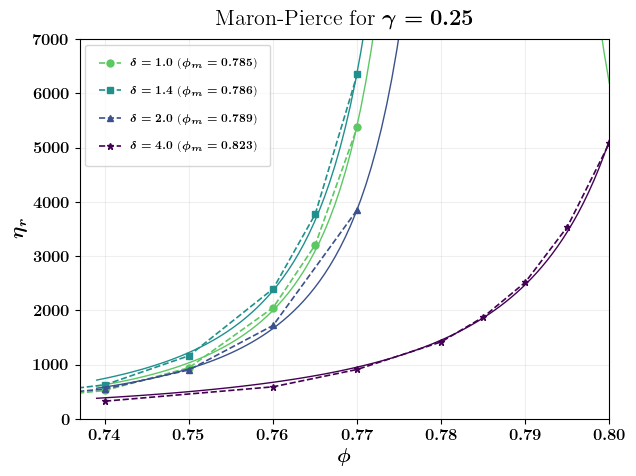

In [4]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

plt.clf()

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.25'
numRuns = 2
off     = 100

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/(k))) ** -2

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.785,.785,.792,0.815] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    visc = []
    #vrj = '0.25' if arj == 1 else vrr
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan) 
        
    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    
    # curve fit
    popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.739, .80, 100)
    yy = maronpierce(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
        residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
        TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

#print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.737, .80)
plt.ylim(0, 7000)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(fr'Maron-Pierce for $\gamma = {vrr}$', fontsize=16, pad=10)
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [34]:
phim

[0.7854954763461525,
 0.7855437529576518,
 0.7891401952846274,
 0.8226712334321397]

<Figure size 640x480 with 0 Axes>

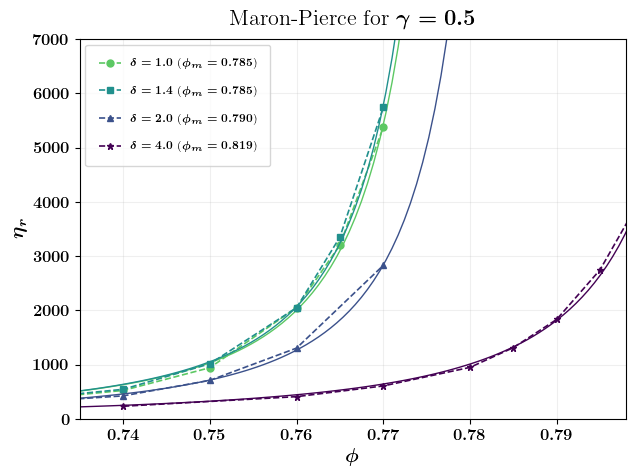

In [24]:
# maron pierce plot
%matplotlib inline
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

#mac
#topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

plt.clf()

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.5'
numRuns = 2
off     = 100

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/(k))) ** -2

plt.figure();

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.785,.785,.792,0.82] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    visc = []
    #vrj = '0.25' if arj == 1 else vrr
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan) 
        
    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phi_vals) if not np.isnan(x)]
    
    # curve fit
    popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.73, .80, 100)
    yy = maronpierce(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
        residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
        TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
#print(table)

#print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.735, .798)
plt.ylim(0, 7000)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(fr'Maron-Pierce for $\gamma = {vrr}$', fontsize=16, pad=10)
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [25]:
phim

[0.7854954763461525,
 0.7848770357288001,
 0.7901457354497431,
 0.8192596591068829]

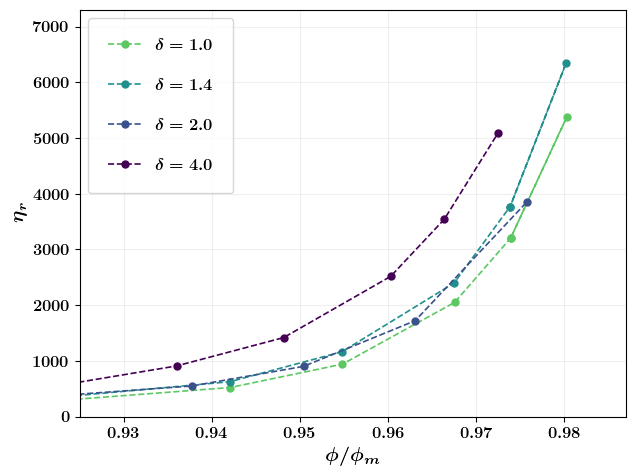

In [79]:
# To plot parameter vs phim
# plotting functions

#mac
#topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.25'
numRuns = 2
off     = 100
cmap    = matplotlib.colormaps['viridis_r'] #color scheme
phim    = [0.7854954763461525,0.7855437529576518,0.7891401952846274,0.8226712334321397] # vr = 0.25
#phim    = [0.7854954763461525,0.7848770357288001,0.7901457354497431,0.8192556503443613] # vr = 0.5
#phim    = [0.7854954763461525,0.7853357301032967,0.7873975128014937,0.8021663345214478] # vr = 0.75

for j, arj in enumerate(arr):
    visc      = []
    viscerr   = []
    phim_vals = [i/phim[j] for i in phiv]
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        viscerr_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan)
        viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
    visc_filtered      = [x for x in visc if not np.isnan(x)]
    viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
    phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]
    
    #plt.errorbar(phim_vals_filtered, visc_filtered, yerr=viscerr_filtered, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)
    plt.errorbar(phim_vals_filtered, visc_filtered, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj),  
             color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xlim(.925,.987)
plt.ylim(0,7300)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', labelspacing=1.5, borderpad=1.2, fontsize=12)
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)
plt.show()

In [86]:
0.795/phim[3]

0.9699316020051786

In [23]:
print(f"{topDir}NP_{npp}/phi_0.74/ar_1.0/Vr_0.5/run_{run+1}/")
os.path.exists(f"{topDir}NP_{npp}/phi_0.74/ar_1.4/Vr_0.5/run_{run+1}/")

/Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.74/ar_1.0/Vr_0.5/run_2/


True

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.785 | 2.110 | 0.998 |
|  1.4  | 0.785 | 2.134 | 0.996 |
|  2.0  | 0.787 | 1.678 | 0.999 |
|  4.0  | 0.802 | 1.779 | 1.000 |
+-------+-------+-------+-------+

 R-squared mean: 0.998


<Figure size 640x480 with 0 Axes>

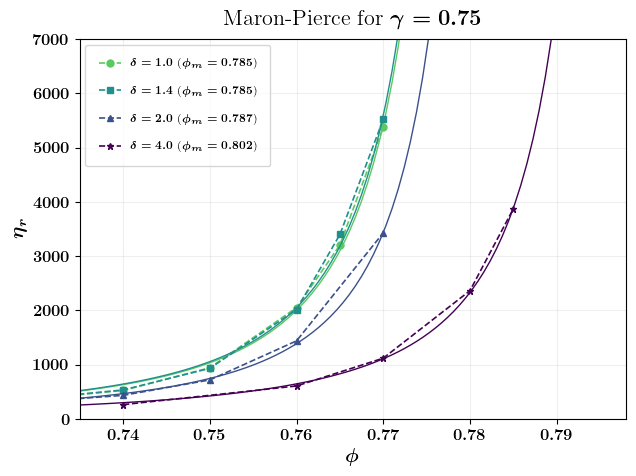

In [26]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

#mac
#topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

plt.clf()

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.75'
numRuns = 2
off     = 100

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/(k))) ** -2

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.785,.785,.792,0.82] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    visc = []
    #vrj = '0.25' if arj == 1 else vrr
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan) 
        
    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phi_vals) if not np.isnan(x)]
    
    # curve fit
    popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.73, .80, 100)
    yy = maronpierce(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
        residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
        TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.735, .798)
plt.ylim(0, 7000)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(fr'Maron-Pierce for $\gamma = {vrr}$', fontsize=16, pad=10)
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [27]:
phim

[0.7854954763461525,
 0.7853357301032967,
 0.7873975128014937,
 0.8021663345214478]

In [66]:
## chong and shapiro data

# chong
phij_chong = 0.66
phi_chong = [0.550, 0.575, 0.585, 0.605, 0.615, 0.630, 0.650]
phim_chong = [ii/phij_chong for ii in phi_chong]
visc_chong = [13, 19,20,60,70,170,700]

# shairo
phij_shapiro = 0.6
phi_shapiro = [0.3,0.35,0.4,0.45,0.5,0.55]
phim_shapiro = [ii/phij_shapiro for ii in phi_shapiro]
visc_shapiro = [2.8,4.0, 6.0,11.0,21.0,950]

#pednekar
phij_pednekar = 0.69
phi_pednekar = [0.6,0.62,0.64,0.65,0.66]
phim_pednekar = [ii/phij_pednekar for ii in phi_pednekar]
visc_pednekar = [70,120,220,320,560]

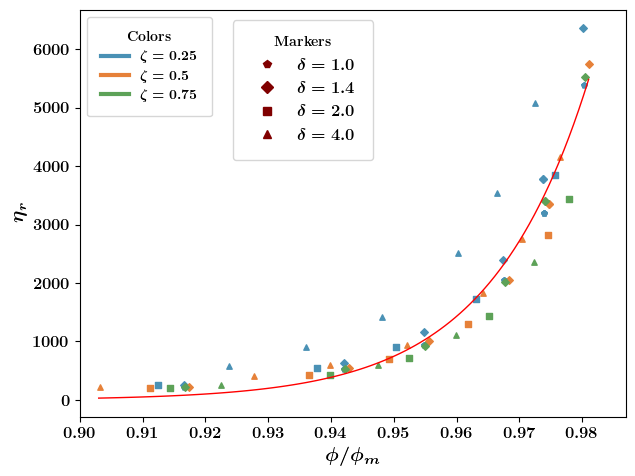

In [81]:
# To plot parameter vs phim all zeta values
# plotting functions
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
#mac
#topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
#cmap    = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']
#marker_shape = ['x', 'D', '*', '+', 'p']
marker_shape = ['p', 'D', 's', '^']
#phim    = [0.785495476352502, 0.7848770357422185, 0.7901457354577499, 0.819645424848994]

phim = [[0.7854954763461525, 0.7855437529576518, 0.7891401952846274, 0.8226644737782638], 
        [0.7854954763461525, 0.7848770357288001, 0.7901457354497431, 0.8192596591068829],
        [0.7854954763461525, 0.7853357301032967, 0.7873975128014937, 0.8021663345214478]]
viscall = []
phimall = []
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vrl
                ll  = 0      if arj == 1 else l
                phim_vals = [i/phim[ll][j] for i in phiv]
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        #plt.errorbar(phim_vals_filtered, visc_filtered, yerr=viscerr_filtered, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[j], s=15, 
            label=r'$\delta = {:.1f}$'.format(arj), color=colors[ll])

## plotting chong and shapiro (does not match)
#plt.scatter(phim_chong, visc_chong, marker='x', s=20, label=r'$\delta = 4.0$', color='#8A2BE2') # purple
#plt.scatter(phim_shapiro, visc_shapiro, marker='*', s=20, label=r'$\delta = 4.0$', color='#6A4E23') # brown
#plt.scatter(phim_pednekar, visc_pednekar, marker='*', s=20, label=r'$\delta = 4.0$', color='#6A4E23') # brown

#plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xlim(.9,.987)
#plt.ylim(0,7300)
#plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(loc='upper left', labelspacing=1.5, borderpad=1.2, fontsize=12)
plt.tight_layout()

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]
def power_law(x, a, b):
    return a * x**b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(0.903, max(phimFlat), 100)
plt.plot(xlin, power_law(xlin, *params), color='red', label=f"Fitted power law: y = {a:.2f} * x^{b:.2f}")


color_legend_elements = [
    Line2D([0], [0], color=colors[ll], lw=3, label=fr'$\zeta = {vrr[ll]}$')
    for ll in range(len(vrr))
    ]

marker_legend_elements = [
        Line2D([0], [0], marker=marker_shape[j], color='#800000', lw=0, label=r'$\delta = {:.1f}$'.format(arr[j]), markersize=6)
        for j in range(len(arr))
        ]

legend1 = plt.legend(handles=color_legend_elements, loc='best', title=r"\textbf{Colors}",
                     title_fontsize='10', borderpad=1.05, prop={'size': 10})
legend2 = plt.legend(handles=marker_legend_elements, loc=(0.28, 0.63), title=r"\textbf{Markers}",
                    title_fontsize='10', borderpad=1.05, prop={'size': 12})
plt.gca().add_artist(legend1)

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)
plt.show()

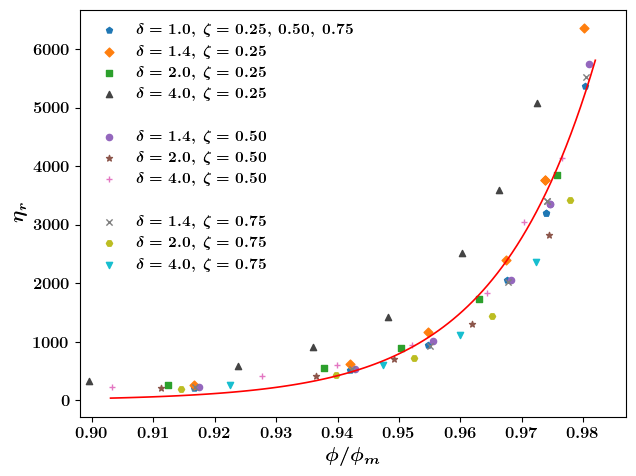

In [36]:
# To plot parameter vs phim all zeta values
# plotting functions

from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

phim    = [[0.7854954763461525, 0.7855437529576518, 0.7891401952846274, 0.8226644737782638], 
          [0.7854954763461525, 0.7848770357288001, 0.7901457354497431, 0.8192596591068829],
          [0.7854954763461525, 0.7853357301032967, 0.7873975128014937, 0.8021663345214478]]
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [i/phim[0][0] for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [i/phim[l][j+1] for i in phiv]
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xlim(.898,.987)
#plt.ylim(0,7300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=11, frameon=False)
plt.tight_layout()

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]
def power_law(x, a, b):
    return a * x**b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(0.903, 0.982, 100)
plt.plot(xlin, power_law(xlin, *params), color='r', label=f"Fitted power law: y = {a:.2f} * x^{b:.2f}", linewidth=1.2)

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

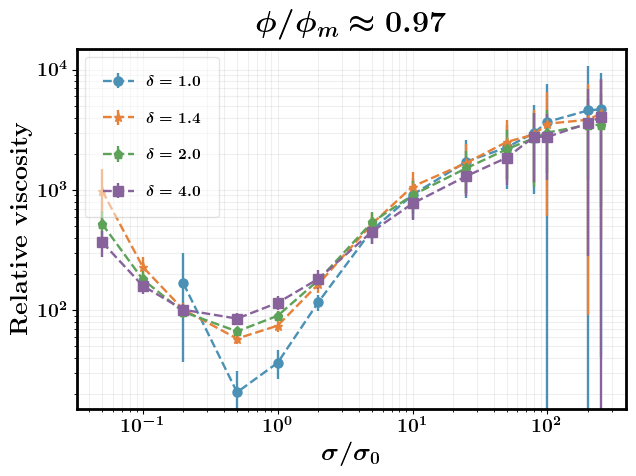

In [38]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.errorbar(stress_plot, visc_plot, yerr=visc_err_plot, linestyle='--', 
         marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color  = colors[j], linewidth=1.7, markersize=6.5)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{Relative viscosity}$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='upper left', fontsize=11, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

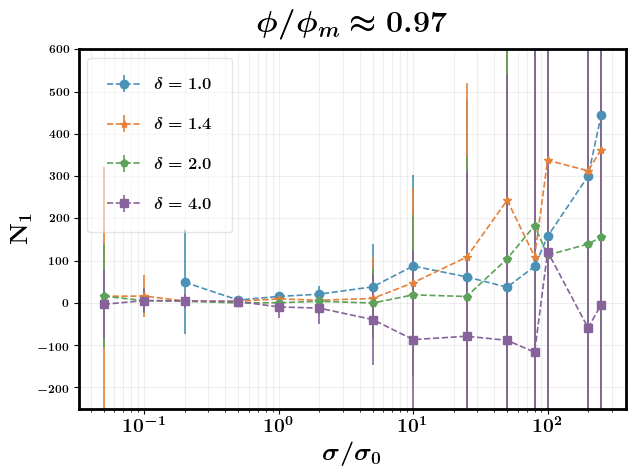

In [40]:
## N1 curve for stress controlled sims (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 10][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.errorbar(stress_plot, visc_plot, yerr=visc_err_plot, linestyle='--', 
         marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color  = colors[j], linewidth=1.2, markersize=6)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{N}_{1}$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='upper left', fontsize=12, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.ylim([-250, 600])

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
#plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "n1_flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

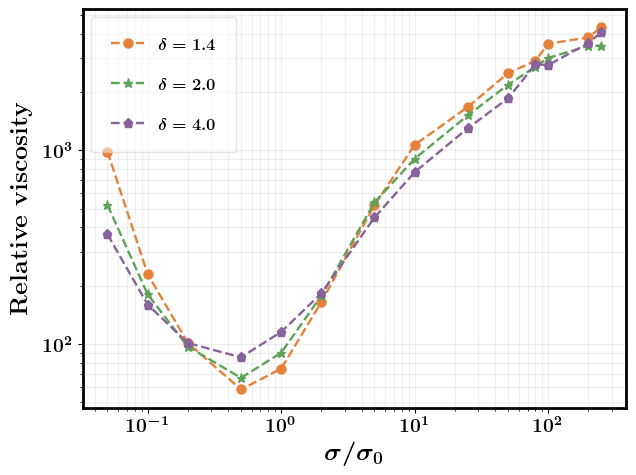

In [42]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'

# below lists should be of the same length
phi = [0.765, 0.77, 0.795]
ar  = [1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress  = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j+1], linewidth=1.7, markersize=6.5)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{Relative viscosity}$', fontsize=18, fontweight='bold', style='italic', labelpad=8)
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=24, fontweight='bold',  pad=10)
plt.legend(loc='upper left', fontsize=12, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000], [r'$10^{2}$', r'$10^{3}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".png"
    plt.savefig(fig_save_path+ "flowcurve2"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

In [13]:
## simulation progress

npp = 1000
vr  = '0.5'

# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress  = ['0.05', '0.1', '0.2', '0.5', '1', '2', '5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
#topDir = "/Volumes/Rahul_2TB/Miscelleneous/low_stress_othermac/low_stress"
#fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/NCS workshop poster/"

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']


for s in range(len(stress)):
    print('\\')
    for j, arj in enumerate(ar):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    gamma   = data_array[-1,1]
                    if gamma != 12:
                        print(f'stress_{stress[s]}r/phi_{phi[j]}/ar_{arj} - {gamma}')
                else:
                    print(f'stress_{stress[s]}r/phi_{phi[j]}/ar_{arj} - -f error')

\
\
\
\
\
\
\
\
\
\
\
\
\
\


In [76]:
# Check if F_rig exists

phi_vals = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76] #[0.70, 0.72, 0.74, 0.77]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 1
topDir   = '/Users/rahul/mnt/sshfs_darwin/simulations/'

for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vr}/run_{run+1}/"
                if os.path.exists(workDir):
                    if not os.path.exists(workDir + 'F_rig.txt'):
                        print(f'No F_rig - {workDir}')

No F_rig - /Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.76/ar_1.0/Vr_0.75/run_1/
No F_rig - /Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.75/ar_2.0/Vr_0.75/run_1/


In [68]:
dataFile = glob.glob('/Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.73/ar_2.0/Vr_0.75/run_1/F_rig.txt')[0]
data = np.loadtxt(dataFile)